In [47]:
import pandas as pd 
from SALib.sample import saltelli 
from SALib.analyze import sobol
import numpy as np 

In [48]:
gcm =  [chr(i) for i in range(ord('a'), ord('q')+1)]
method = ["m1", "m2", "m3"]
scenario = ["s1", "s2", ]

In [49]:
location = pd.read_csv("D:\Min\Review GCM\Region and Location\Expected_Location.csv").iloc[:, 1:]

In [50]:
location = location[location.lat > -60].reset_index(drop = True)

In [51]:
from itertools import product

In [52]:
# Generate all combinations
combinations = product(location.itertuples(index=False), gcm, method, scenario)

# Create DataFrame from combinations
result_df = pd.DataFrame(combinations, columns=['location', 'gcm', 'method', 'scenario'])

# Split location column into lat and lon
result_df[['lat', 'lon']] = pd.DataFrame(result_df['location'].tolist(), index=result_df.index)
result_df.drop(columns=['location'], inplace=True)

In [53]:
additional_columns = np.random.randint(-30, 51, size=(len(result_df), 30))

for i in range(1, 31):
    result_df[f'y{i}'] = additional_columns[:, i-1]


In [54]:
grouped_df = result_df.groupby(['lat', 'lon'])

In [55]:
lat_lon_pair = (6.0, 0.0)
specific_group = grouped_df.get_group(lat_lon_pair)

In [56]:
specific_group.drop(["lat", "lon"], axis = 1, inplace=True)

C:\Users\USER2\AppData\Local\Temp\ipykernel_13420\2785708857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific_group.drop(["lat", "lon"], axis = 1, inplace=True)


In [57]:
problem = {
    'num_vars' : 3,
    'names' : ["gcm", "scenario", "method"],
    'bounds': [[0,17], [0,2], [0,3]]
}

In [58]:
X = saltelli.sample(problem, 1024)
X = X.astype(int)

C:\Users\USER2\AppData\Local\Temp\ipykernel_13420\3446124801.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  X = saltelli.sample(problem, 1024)


In [59]:
N = len(X)

In [60]:
t = [f'y{i}' for i in range(1,31)]

In [61]:
Y = np.zeros((N, len(t)))

In [62]:
specific_group.head()

,gcm,method,scenario,y1,y2,y3,y4,y5,y6,y7,...,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30
0,a,m1,s1,-24,-14,13,4,1,33,43,...,6,4,23,-15,43,-19,44,26,46,-1
1,a,m1,s2,-29,46,-26,34,31,34,13,...,-3,29,-28,-28,-24,-1,-16,-22,13,-14
2,a,m2,s1,38,-20,-10,-6,-7,-10,8,...,4,-4,6,6,7,45,-6,-10,-27,-6
3,a,m2,s2,-29,38,31,28,-14,49,-6,...,21,3,9,23,11,-8,34,-6,-23,38
4,a,m3,s1,-6,44,41,-6,30,-7,49,...,11,42,-10,27,46,6,-26,14,-18,46


In [63]:
for i,x in enumerate(X):
    g,s,m = gcm[x[0]], scenario[x[1]], method[x[2]]
    df = specific_group[(specific_group.gcm == g) & (specific_group.scenario == s) & (specific_group.method == m)]
    Y[i,:] = df.iloc[:,3:].values


In [64]:
Y[:,2]

array([-10., -27.,  31., ...,   9.,  35.,   9.])

In [80]:
df = pd.DataFrame(columns=['gcm', 'scenario', 'method', 
                                      'gcm:scenario', 'gcm:method', 'scenario:method',
                                      'gcm_T', 'scenario_T', 'method_T'])

In [81]:
for y in range(0, len(t)):
    print(y)
    Si = sobol.analyze(problem, Y[:,y], print_to_console=False)
    df.loc[y, 'gcm'] = Si['S1'][0]
    df.loc[y, 'scenario'] = Si['S1'][1]
    df.loc[y, 'method'] = Si['S1'][2]
    df.loc[y, 'gcm_T'] = Si['ST'][0]
    df.loc[y, 'scenario_T'] = Si['ST'][1]
    df.loc[y, 'method_T'] = Si['ST'][2]
    df.loc[y, 'gcm:scenario'] = Si['S2'][0,1]
    df.loc[y, 'gcm:method'] = Si['S2'][0,2]
    df.loc[y, 'scenario:method'] = Si['S2'][1,2]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [83]:
df['year'] = [y for y in range(2061,2091)]

In [84]:
df

,gcm,scenario,method,gcm:scenario,gcm:method,scenario:method,gcm_T,scenario_T,method_T,year
0,0.236814,-0.002236,0.064867,0.169275,0.259587,0.066483,0.894428,0.453532,0.60642,2061
1,0.167646,-0.000267,0.028094,0.124371,0.337088,0.058541,0.972921,0.484004,0.720163,2062
2,0.076915,0.095066,0.058212,0.164986,0.341056,-0.061382,0.907763,0.550467,0.700529,2063
3,0.090595,0.068541,0.070882,0.125161,0.425763,-0.00493,0.890557,0.471356,0.735649,2064
4,0.162333,0.017511,0.071027,0.126234,0.353387,-0.013157,0.94434,0.435678,0.679385,2065
5,0.15128,0.042542,0.005662,0.063061,0.307659,0.035126,0.919737,0.482585,0.714091,2066
6,0.17475,0.032627,0.024643,0.097741,0.323528,-0.022764,0.917091,0.422154,0.668092,2067
7,0.135011,0.027752,0.021617,0.154774,0.431789,0.040774,0.887214,0.433586,0.716486,2068
8,0.242993,-0.00894,0.032085,0.162303,0.362886,0.022965,0.992499,0.35628,0.580367,2069
9,0.195084,0.096353,0.070302,0.098015,0.327984,0.045964,0.932281,0.478162,0.704722,2070


In [85]:
year = df['year']
gcm = df['gcm']
scenario = df['scenario']
method = df['method']
gcm_scenario = df['gcm:scenario']
gcm_method = df['gcm:method']
scenario_method = df['scenario:method']
gcm_T = df['gcm_T']
scenario_T = df['scenario_T']
method_T = df['method_T']

In [70]:
data_stack = [gcm, scenario, method,gcm_scenario, gcm_method, scenario_method, gcm_T, scenario_T, method_T]

In [71]:
df.set_index('year', inplace=True)

In [72]:
df = df.iloc[:,:6].abs()

<Axes: xlabel='year'>

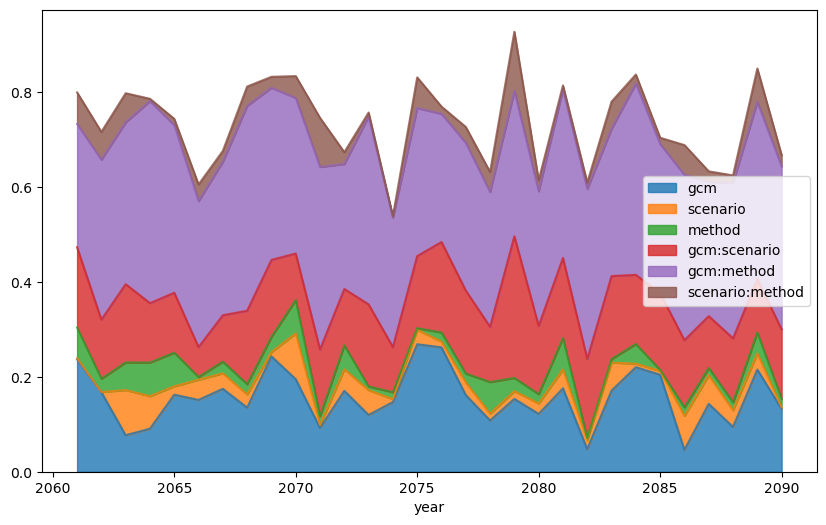

In [73]:
df.plot.area(alpha=0.8, figsize=(10, 6))

In [98]:
from scipy import stats

In [99]:
def gaussian_smooth(x, y, sd):
    weights = np.array([stats.norm.pdf(x, m, sd) for m in x])
    weights = weights / weights.sum(1)
    return (weights * y).sum(1)

In [111]:
yy = [df["gcm"], df["scenario"], df["method"], df["gcm:scenario"], df["gcm:method"], df["scenario:method"]]